In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [11]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**NOTE**

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.

**MODEL INTERPRETATION: WHITE BOX VERSUS BLACK BOX**

Decision Trees are intuitive, and their decisions are easy to interpret. Such models are often called white box models. In contrast, as we will see, Random Forests or neural networks are generally considered black box models. They make great predictions, and you can easily check the calculations that they performed to make these predictions; nevertheless, it is usually hard to explain in simple terms why the predictions were made. For example, if a neural network says that a particular person appears on a picture, it is hard to know what contributed to this prediction: did the model recognize that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch that they were sitting on? Conversely, Decision Trees provide nice, simple classification rules that can even be applied manually if need be (e.g., for flower classification).

#### Predict probability

In [19]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [20]:
tree_clf.predict([[5, 1.5]])

array([1])

The training algorithm compares all features **(or less if max_features is set)** on all samples at each node. Comparing all features on all samples at each node results in a training complexity of O(n × m log2(m)). For small training sets (less than a few thousand instances), Scikit-Learn can speed up training by presorting the data **(set presort=True)**, but doing that slows down training considerably for larger training sets.

### Regularization Hyperparameters

* **max_depth will**     regularize the model and thus reduce the risk of overfitting.
* **min_samples_split**  (the minimum number of samples a node must have before it can be split)
* **min_samples_leaf**   (the minimum number of samples a leaf node must have)
* **max_leaf_nodes**     (the maximum number of leaf nodes), 
* **max_features**   (the maximum number of features that are evaluated for splitting at each node)

**NOTE**

Other algorithms work by first training the Decision Tree without restrictions, then pruning (deleting) unnecessary nodes. A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant. Standard statistical tests, such as the χ2 test (chi-squared test), are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis). If this probability, called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned.

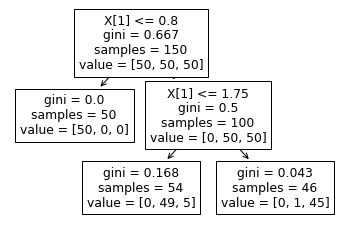

In [27]:
#ornegin agacimiz su an bu. Hiper parametreler ile oynaylım.
tree.plot_tree(tree_clf);

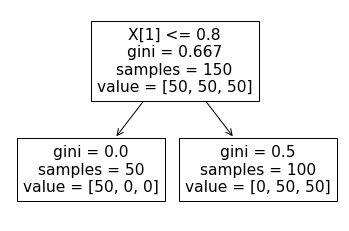

In [30]:
#max_deept=1 yaparsak:
tree_clf = DecisionTreeClassifier(max_depth=1).fit(X, y)
tree.plot_tree(tree_clf);

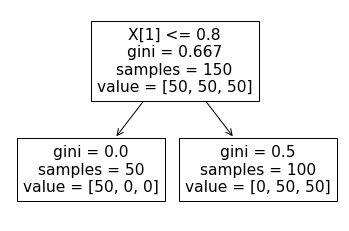

In [41]:
#min samples split=100
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=110).fit(X, y)
tree.plot_tree(tree_clf);

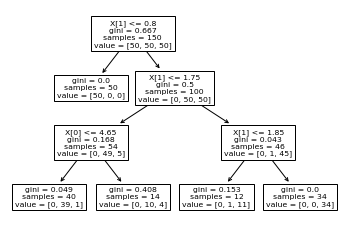

In [43]:
#min samples leaf=100
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10).fit(X, y)
tree.plot_tree(tree_clf);

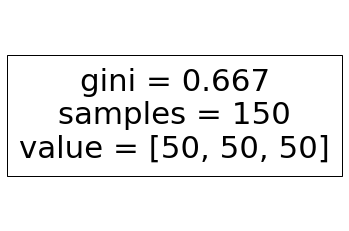

In [44]:
#min samples leaf=100
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=100).fit(X, y)
tree.plot_tree(tree_clf);

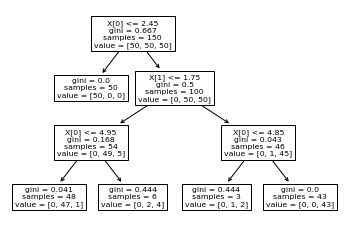

In [45]:
#max_leaf_nodes (the maximum number of leaf nodes),
#max_features (the maximum number of features that are evaluated for splitting at each node)
tree_clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
tree.plot_tree(tree_clf);

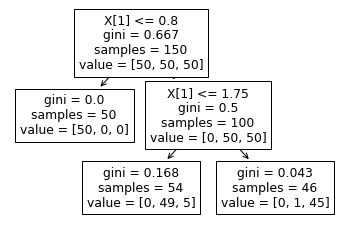

In [49]:
tree_clf = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=3).fit(X, y)
tree.plot_tree(tree_clf);

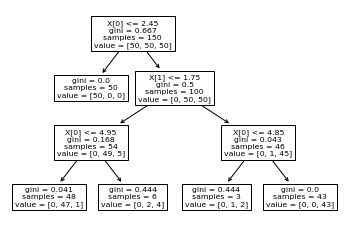

In [50]:
tree_clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
tree.plot_tree(tree_clf);

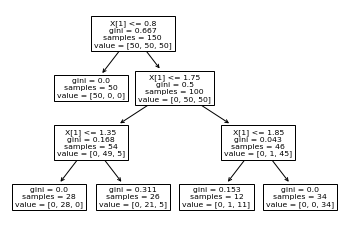

In [62]:
tree_clf = DecisionTreeClassifier(max_depth=3,max_features=1).fit(X, y)
tree.plot_tree(tree_clf);

In [86]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=10000, noise=0.4)
X_train,X_test, y_train,y_test,=train_test_split(X,y,test_size=0.2,random_state=42)

array([[ 1.4583334 , -0.81279945],
       [-0.42504552,  0.8079642 ],
       [-0.29455455,  1.18777675],
       ...,
       [-0.20080153,  0.2776753 ],
       [ 1.26116027, -0.11701181],
       [ 0.26675914,  1.5096862 ]])

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
tree_clf=DecisionTreeClassifier()
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) } 

grid_cv=GridSearchCV(tree_clf, cart_grid, cv=5, n_jobs=-1)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'mi

In [94]:
grid_cv.best_params_

{'max_depth': 6, 'min_samples_split': 37}

In [95]:
tree_clf.max_depth=6
tree_clf.min_samples_split=46
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [96]:
y_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score
ac_score=accuracy_score

In [99]:
?accuracy_score

Signature: accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
Docstring:
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

Read more in the :ref:`User Guide <accuracy_score>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

normalize : bool, optional (default=True)
    If ``False``, return the number of correctly classified samples.
    Otherwise, return the fraction of correctly classified samples.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    If ``normalize == True``, return the fraction of correctly
    classified samples (float), else returns the num